### 1.2.1 : Feature Extraction and EDA (II)


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("df_fe_without_preprocessing_train.csv")
df.fillna('')

id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
5            5      11      12   
6            6      13      14   
7            7      15      16   
8            8      17      18   
9            9      19      20   
10          10      21      22   
11          11      23      24   
12          12      25      26   
13          13      27      28   
14          14      29      30   
15          15      31      32   
16          16      33      34   
17          17      35      36   
18          18      37      38   
19          19      39      40   
20          20      41      42   
21          21      43      44   
22          22      45      46   
23          23      47      48   
24          24      49      50   
25          25      51      52   
26          26      53      54   
27          27      55      56   
28          28      57      58   
29          29      59      60   
...        ...     ...     ...   
404260  404260  182494     691   
404261  404261  281150  124172   
404262  404262  537905  466328   
404263  404263  375195  537906   
404264  404264  537907  537908   
404265  404265   25994   16064   
404266  404266  155813  146284   
404267  404267   20171  290649   
404268  404268  537909  537910   
404269  404269  537911  349794   
404270  404270  537912   35364   
404271  404271  537913  537914   
404272  404272  128018   14005   
404273  404273  537915  537916   
404274  404274  178643   87385   
404275  404275   97922  537917   
404276  404276   24305  308365   
404277  404277  355668  537918   
404278  404278  537919  169786   
404279  404279  537920  537921   
404280  404280  537922  537923   
404281  404281   99131   81495   
404282  404282    1931   16773   
404283  404283  537924  537925   
404284  404284  537926  537927   
404285  404285  433578  379845   
404286  404286   18840  155606   
404287  404287  537928  537929   
404288  404288  537930  537931   
404289  404289  537932  537933   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
5       Astrology: I am a Capricorn Sun Cap moon and c...   
6                                     Should I buy tiago?   
7                          How can I be a good geologist?   
8                         When do you use シ instead of し?   
9       Motorola (company): Can I hack my Charter Moto...   
10      Method to find separation of slits using fresn...   
11            How do I read and find my YouTube comments?   
12                   What can make Physics easy to learn?   
13            What was your first sexual experience like?   
14      What are the laws to change your status from a...   
15      What would a Trump presidency mean for current...   
16                           What does manipulation mean?   
17      Why do girls want to be friends with the guy t...   
18      Why are so many Quora users posting questions ...   
19      Which is the best digital marketing institutio...   
20                             Why do rockets look white?   
21                  What's causing someone to be jealous?   
22        What are the questions should not ask on Quora?   
23                               How much is 30 kV in HP?   
24      What does it mean that every time I look at th...   
25      What are some tips on making it through the jo...   
26                               What is web application?   
27      Does society place too much importance on sports?   
28                 What is best way to make money online?   
29                 How should I prepare for CA final law?   
...         

- Import the required lib packages for pre-processing, like: re, nltk, BeautifulSoup etc.
- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - removing Stopwords
    - expanding contractions etc.

In [12]:
import re
import pandas as pd
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup


SAFE_DIV = 0.0001 
# To get the results in 4 decemal points

STOP_WORDS = stopwords.words("english")

#print STOP_WORDS


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    #print "Removing Punctuations..."
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    #print "Removing HTML tags and performing stemming..."
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

In [13]:
#Preprocess the Questions:
df["question1"] = df["question1"].fillna("").apply(preprocess)
df["question2"] = df["question2"].fillna("").apply(preprocess)


In [22]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   
2   2     5     6  how can i increase the speed of my internet co...   
3   3     7     8  why am i mentally very lonely  how can i solve...   
4   4     9    10  which one dissolve in water quikly sugar  salt...   

                                           question2  is_duplicate  freq_qid1  \
0  what is the step by step guide to invest in sh...             0          1   
1  what would happen if the indian government sto...             0          4   
2  how can internet speed be increased by hacking...             0          1   
3  find the remainder when  math 23  24   math  i...             0          1   
4            which fish would survive in salt water              0          3   

   freq_qid2  q1len  q2len  q1_n_words  q2_n_words  word_Common  word_Total  \
0          1     66     57          14          12         10.0        23.0   
1          1     51     88           8          13          4.0        20.0   
2          1     73     59          14          10          4.0        24.0   
3          1     50     65          11           9          0.0        19.0   
4          1     76     39          13           7          2.0        20.0   

   word_share  freq_q1+q2  freq_q1-q2  
0    0.434783           2           0  
1    0.200000           5           3  
2    0.166667           2           0  
3    0.000000           2           0  
4    0.100000           4           2

- Function to Compute and get the features : With 2 parameters of Question 1 and Question 2

In [15]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence of Que. in the Tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features




In [16]:
# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

In [17]:
def extract_features(df):
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    print("fuzzy features..")
    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df



The new features are:

- ratio of common_word_count to min lenghth of word count of que 1 and que 2
        - cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
- ratio of common_word_count to max lenghth of word count of que 1 and que 2
        - cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
- ratio of common_stop_count to min lenghth of stop count of que 1 and que 2
        - csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
- ratio of common_stop_count to max lenghth of stop count of que 1 and que 2
        - csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
- ratio of common_token_count to min lenghth of token count of que 1 and que 2
        - ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
- atio of common_token_count to max lenghth of token count of que 1 and que 2 
        - ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
        
- Last word of both question is same or not:
        - ast_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
- First word of both question is same or not  
        - first_word_eq = int(q1_tokens[0] == q2_tokens[0])
    
- Abs. length difference
        -abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
    
- Average Token Length of both Questions:
        -mean_len = (len(q1_tokens) + len(q2_tokens))/2
    
    

In [93]:
df.columns

Index([u'id', u'qid1', u'qid2', u'question1', u'question2', u'is_duplicate',
       u'freq_qid1', u'freq_qid2', u'q1len', u'q2len', u'q1_n_words',
       u'q2_n_words', u'word_Common', u'word_Total', u'word_share',
       u'freq_q1+q2', u'freq_q1-q2'],
      dtype='object')

In [18]:
print("Extracting features for train:")
train_df = pd.read_csv("train.csv")
train_df = extract_features(train_df)
#train_df.drop(["id", "qid1", "qid2", "question1", "question2", "is_duplicate"], axis=1, inplace=True)

# Creating new .csv File with total 21 features:
train_df.to_csv("nlp_features_train.csv", index=False)





Extracting features for train:
token features...
fuzzy features..


In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


import os
import gc
dfp = pd.read_csv("nlp_features_train.csv")
dfp.fillna('')
dfp.head()

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   
2   2     5     6  how can i increase the speed of my internet co...   
3   3     7     8  why am i mentally very lonely  how can i solve...   
4   4     9    10  which one dissolve in water quikly sugar  salt...   

                                           question2  is_duplicate   cwc_min  \
0  what is the step by step guide to invest in sh...             0  0.999980   
1  what would happen if the indian government sto...             0  0.799984   
2  how can internet speed be increased by hacking...             0  0.399992   
3  find the remainder when  math 23  24   math  i...             0  0.000000   
4            which fish would survive in salt water              0  0.399992   

    cwc_max   csc_min   csc_max          ...            ctc_max  last_word_eq  \
0  0.833319  0.999983  0.999983          ...           0.785709           0.0   
1  0.399996  0.749981  0.599988          ...           0.466664           0.0   
2  0.333328  0.399992  0.249997          ...           0.285712           0.0   
3  0.000000  0.000000  0.000000          ...           0.000000           0.0   
4  0.199998  0.999950  0.666644          ...           0.307690           0.0   

   first_word_eq  abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  \
0            1.0           2.0      13.0              100                93   
1            1.0           5.0      12.0               86                63   
2            1.0           4.0      12.0               63                63   
3            0.0           2.0      12.0               28                24   
4            1.0           6.0      10.0               67                47   

   fuzz_ratio  fuzz_partial_ratio  longest_substr_ratio  
0          93                 100                     0  
1          66                  75                     0  
2          43                  47                     0  
3           9                  14                     0  
4          35                  56                     0  

[5 rows x 21 columns]

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We acn see the most frequent occuring words

In [26]:
import numpy as np
dfp_d = dfp[dfp['is_duplicate'] == 1]
dfp_nd = dfp[dfp['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([dfp_d["question1"], dfp_d["question2"]]).flatten()

n=np.dstack([dfp_nd["question1"], dfp_nd["question2"]]).flatten()

print len(p)
print len(n)

298526
510054


In [35]:
#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

In [36]:
# Import the Required lib packages for WORD-Cloud generation
from os import path
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [40]:
# reading the text files and removing the Stop Words:
d = path.dirname('/home/abhishek/Documents/')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
type(textp_w)
print len(textp_w)

16112488


- Computing and Plotinng WordClouds

In [56]:
wc = WordCloud(background_color="white", max_words=len(textp_w),
stopwords=stopwords)
# generate word cloud
wc.generate(textp_w)

Word Cloud for Duplicate Question pairs


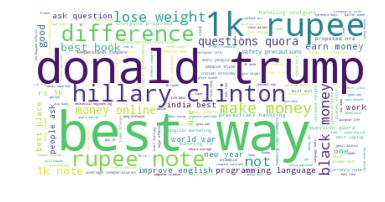

In [57]:
print "Word Cloud for Duplicate Question pairs"
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
wc = WordCloud(background_color="white", max_words=len(textn_w),
stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)

Word Cloud for non-Duplicate Question pairs:


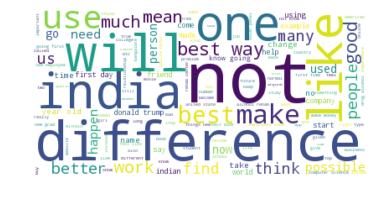

In [51]:
print "Word Cloud for non-Duplicate Question pairs:"
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

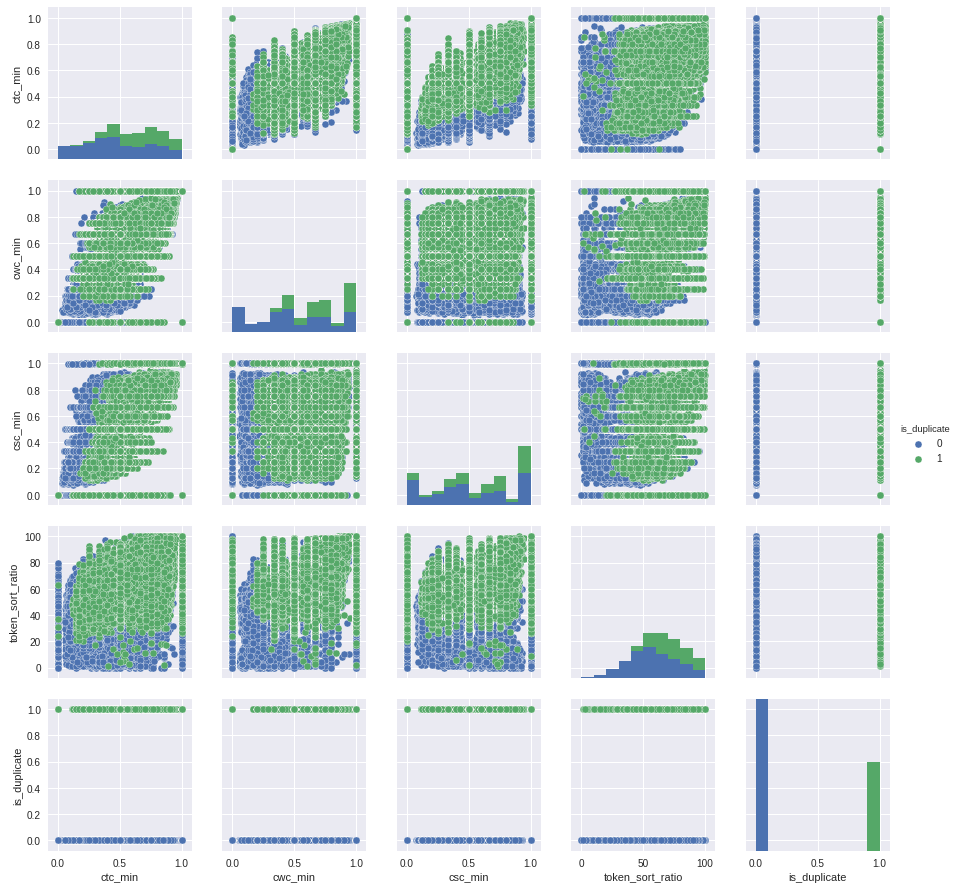

In [66]:
n = dfp.shape[0]
sns.pairplot(dfp[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate')

Scatter plot of token_sort_ratio & csc_min:


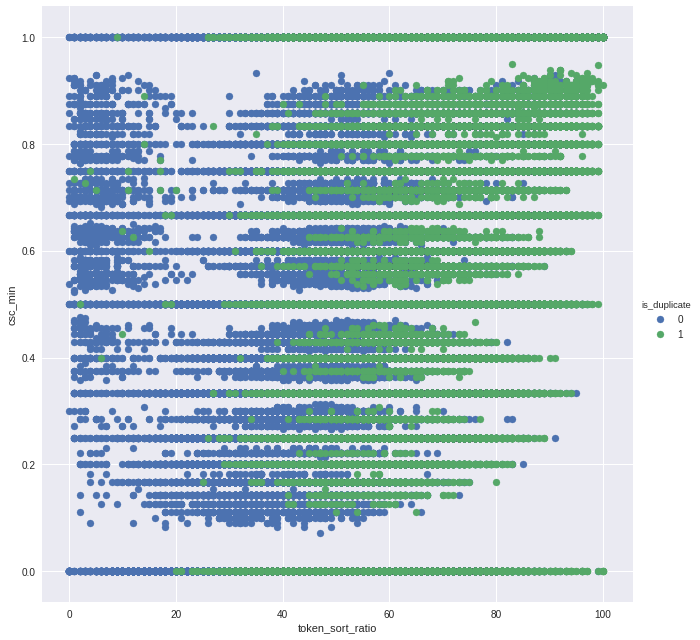

In [79]:
print "Scatter plot of token_sort_ratio & csc_min:"

sns.FacetGrid(dfp, hue="is_duplicate", size=9) \
   .map(plt.scatter, "token_sort_ratio", "csc_min") \
   .add_legend()

Scatter plot of token_sort_ratio & cwc_min:


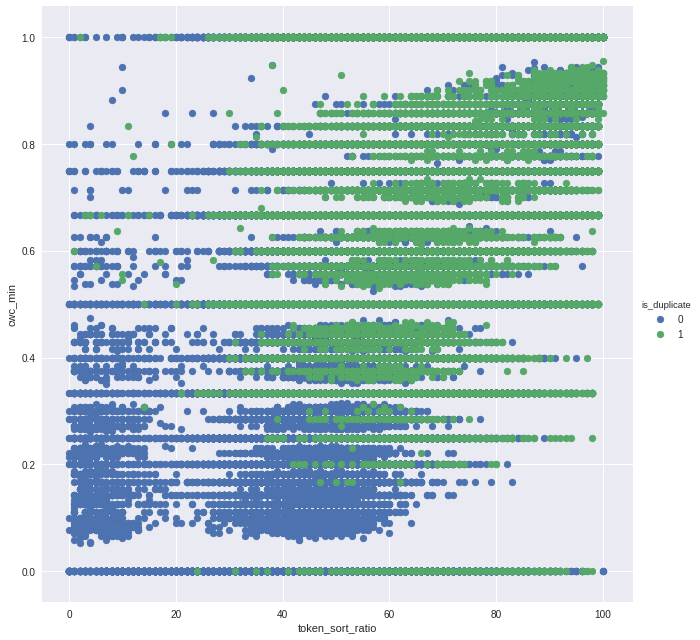

In [80]:
print "Scatter plot of token_sort_ratio & cwc_min:"
sns.FacetGrid(dfp, hue="is_duplicate", size=9) \
   .map(plt.scatter, "token_sort_ratio", "cwc_min") \
   .add_legend()

Scatter plot of token_sort_ratio & ctc_min:


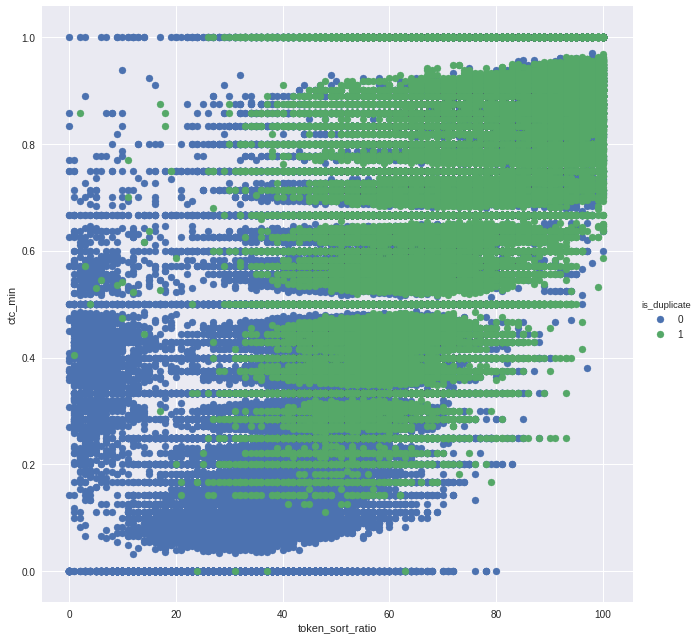

In [81]:
print "Scatter plot of token_sort_ratio & ctc_min:"
sns.FacetGrid(dfp, hue="is_duplicate", size=9) \
   .map(plt.scatter, "token_sort_ratio", "ctc_min") \
   .add_legend()

From above scatter plots:
- token_sort_ratio and ctc_min are slightly sepatated for low values

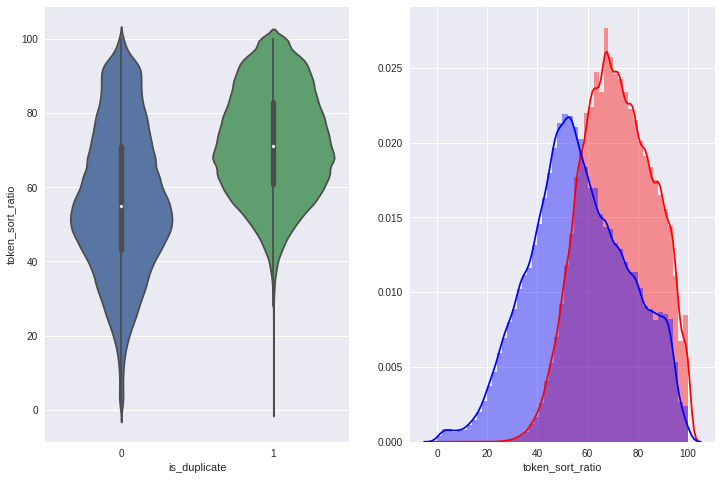

In [88]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)

sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = dfp[0:] , )

plt.subplot(1,2,2)


sns.distplot(dfp[dfp['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')

sns.distplot(dfp[dfp['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )


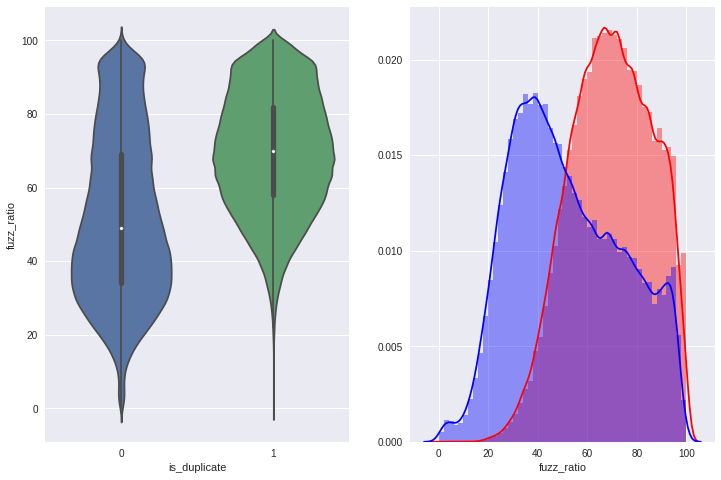

In [85]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)

sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = dfp[0:] , )

plt.subplot(1,2,2)


sns.distplot(dfp[dfp['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')

sns.distplot(dfp[dfp['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )


In [92]:
df_subsampled = dfp[0:20000]

trace = go.Scatter(
    y = df_subsampled['ctc_min'].values,
    x = df_subsampled['token_sort_ratio'].values,
    mode='markers',
    marker=dict(
        size= df_subsampled['cwc_max'].values * 25,
        color = df_subsampled['is_duplicate'].values,
        colorscale='Portland',
        showscale=True,
        opacity=0.5,
        colorbar = dict(title = 'duplicate')
    ),
    text = np.round(df_subsampled['cwc_max'].values, decimals=2)
)
data = [trace]
layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of token_sort_ratio & ctc_min',
    hovermode= 'closest',
        xaxis=dict(
        title= 'token_sort_ratio',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'ctc_min',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterWords')

print "Scatter plot shows that when token sort value and ctc_min value is low and cwc_max is low thwn most of the question pairs are non duplicated "

Scatter plot shows that when token sort value and ctc_min value is low and cwc_max is low thwn most of the question pairs are non duplicated 


In [60]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = dfp[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values


In [63]:
from sklearn.manifold import TSNE
tsne = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=200,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.120217
[t-SNE] Iteration 25: error = 1.8869909, gradient norm = 0.0053463
[t-SNE] Iteration 50: error = 1.8194056, gradient norm = 0.0036612
[t-SNE] Iteration 75: error = 1.5627044, gradient norm = 0.0011805
[t-SNE] Iteration 100: error = 1.5163201, gradient norm = 0.0009617
[t-SNE] Iteration 100: gradient norm 0.000962. Finished.
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.516320
[t-SNE] Iteration 125: error = 1.4428340, gradient norm = 0.0006862
[t-SNE] Iteration 125: gradient norm 0.000686. Finished.
[t-SNE] Error after 125 iterati

In [64]:
trace1 = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')